In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pubchempy as pcp
import re
from collections import defaultdict

# Load data
df = pd.read_csv("/home/tvanhout/oxides_ML/data/VASP_dataset.csv")

# Adding metadata

In [ ]:

# Function to get molecular formula from PubChem
def get_molecular_formula(molecule_name):
    try:
        compound = pcp.get_compounds(molecule_name, 'name')
        if compound:
            return compound[0].molecular_formula  # Retrieve molecular formula
    except:
        return None  # Return None if PubChem lookup fails

# Function to count elements from molecular formula
def count_elements(formula):
    element_counts = defaultdict(int)
    
    if formula:
        # Regex to find elements and their counts (e.g., C2, H6, O)
        matches = re.findall(r'([A-Z][a-z]*)(\d*)', formula)
        
        for element, count in matches:
            element_counts[element] = int(count) if count else 1  # Default count to 1 if missing
    
    return element_counts

# Retrieve molecular formulas
df['Formula'] = df['Molecule'].apply(get_molecular_formula)

# Extract counts of elements (C, S, N, H, O)
for element in ['C', 'S', 'N', 'H', 'O']:
    df[element] = df['Formula'].apply(lambda x: count_elements(x).get(element, 0))


    Surface           Molecule Group       Molecule   Initial Site  \
0      RuO2  alkanes_alkenes_alkynes        Methane          Metal   
1      RuO2  alkanes_alkenes_alkynes        Methane          Metal   
2      RuO2  alkanes_alkenes_alkynes        Methane          Metal   
3      RuO2  alkanes_alkenes_alkynes        Methane          Metal   
4      RuO2  alkanes_alkenes_alkynes        Methane          Metal   
..      ...                      ...            ...            ...   
596    IrO2                 amidines  Acetimidamide         Oxygen   
597    IrO2                 amidines  Acetimidamide         Oxygen   
598    IrO2                 amidines  Acetimidamide  Oxygen Bridge   
599    IrO2                 amidines  Acetimidamide  Oxygen Bridge   
600    IrO2                 amidines  Acetimidamide   Metal Bridge   

     DFT Energy (System)  DFT Energy (Slab)  DFT Energy (Gas)  \
0                -923.57            -899.06            -24.04   
1                -923.57     

# Dataset info

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Surface              601 non-null    object 
 1   Molecule Group       601 non-null    object 
 2   Molecule             601 non-null    object 
 3   Initial Site         601 non-null    object 
 4   DFT Energy (System)  601 non-null    float64
 5   DFT Energy (Slab)    601 non-null    float64
 6   DFT Energy (Gas)     601 non-null    float64
 7   Adsorption Energy    601 non-null    float64
 8   Formula              594 non-null    object 
 9   C                    601 non-null    int64  
 10  S                    601 non-null    int64  
 11  N                    601 non-null    int64  
 12  H                    601 non-null    int64  
 13  O                    601 non-null    int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 65.9+ KB


In [3]:
molecule_groups = df['Molecule Group'].unique()
molecules = df['Molecule'].unique()
surfaces = df['Surface'].unique()

print("Dataset contains ",len(df)," entries of", len(molecules), "different molecules from", len(molecule_groups), "molecule groups adsorpbed on", len(surfaces), "surfaces.")

Dataset contains  601  entries of 40 different molecules from 10 molecule groups adsorpbed on 2 surfaces.


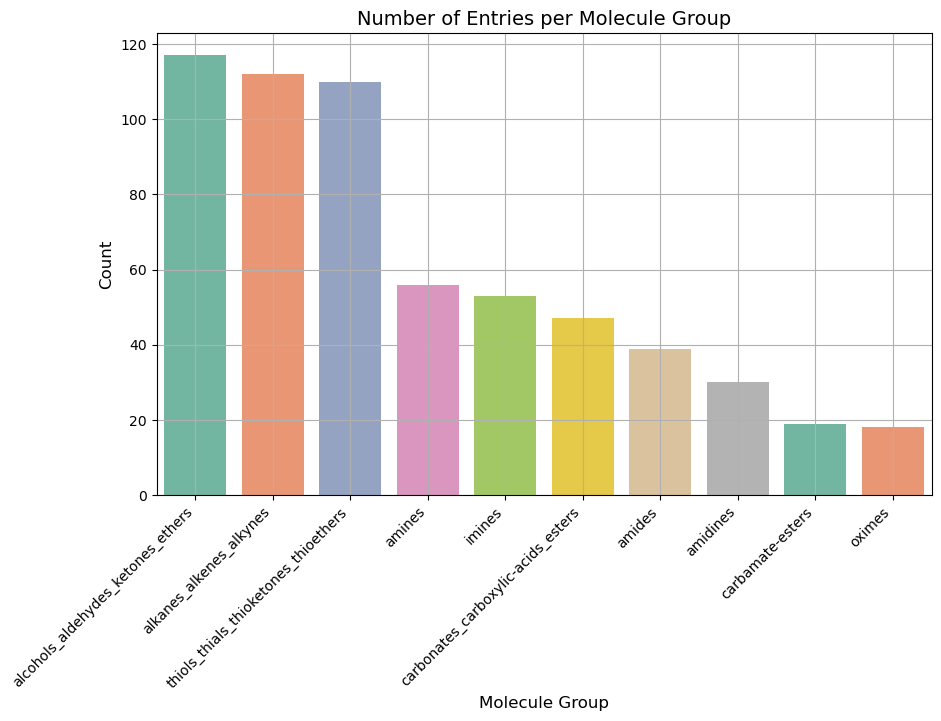

In [4]:
group_counts = df['Molecule Group'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=group_counts.index, y=group_counts.values, hue=group_counts.index, palette="Set2", legend=False)

# Labels and title
plt.xlabel("Molecule Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Number of Entries per Molecule Group", fontsize=14)
plt.grid(True)

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.show()

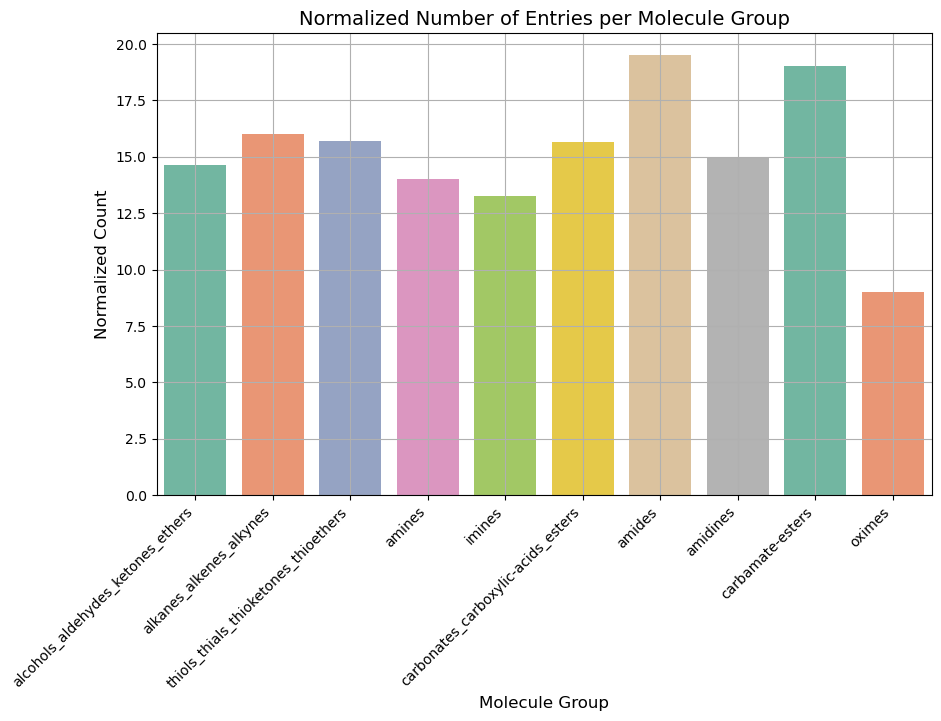

In [5]:
group_counts = df['Molecule Group'].value_counts().reset_index()
group_counts.columns = ["Molecule Group", "Count"]

molecule_counts = df.groupby("Molecule Group")["Molecule"].nunique().reset_index()
molecule_counts.columns = ["Molecule Group", "Total Molecules"]

group_counts = group_counts.merge(molecule_counts, on="Molecule Group")
group_counts["Normalized Count"] = group_counts["Count"] / group_counts["Total Molecules"]

plt.figure(figsize=(10, 6))
sns.barplot(x="Molecule Group", y="Normalized Count", data=group_counts, hue="Molecule Group", palette="Set2", legend=False)

# Labels and title
plt.xlabel("Molecule Group", fontsize=12)
plt.ylabel("Normalized Count", fontsize=12)
plt.title("Normalized Number of Entries per Molecule Group", fontsize=14)
plt.grid(True)

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.show()


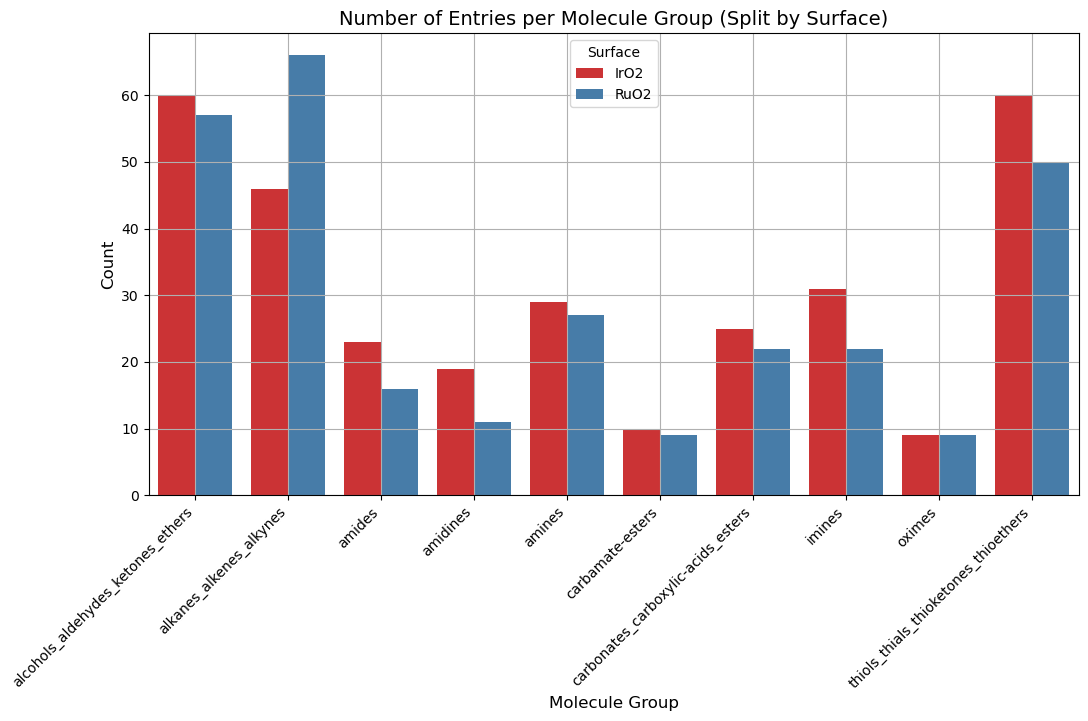

In [6]:
group_surface_counts = df.groupby(['Molecule Group', 'Surface']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(x="Molecule Group", y="Count", hue="Surface", data=group_surface_counts, palette="Set1")

# Labels and title
plt.xlabel("Molecule Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Number of Entries per Molecule Group (Split by Surface)", fontsize=14)
plt.grid(True)

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.legend(title="Surface")

plt.show()

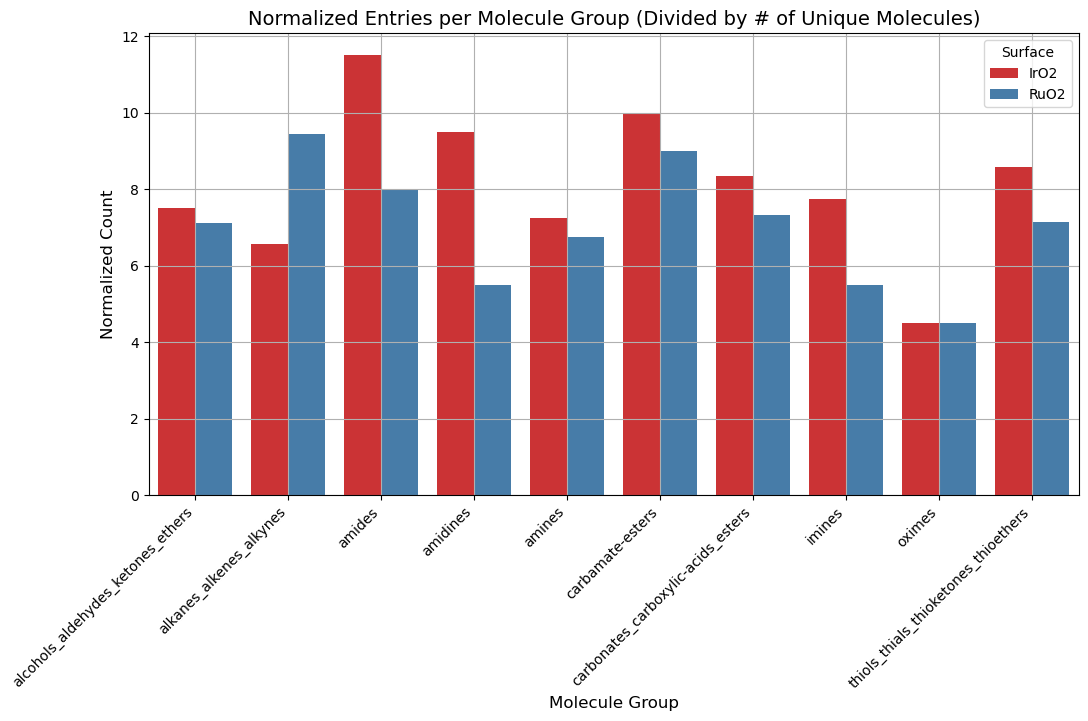

In [7]:
group_surface_counts = df.groupby(['Molecule Group', 'Surface']).size().reset_index(name='Count')

molecule_counts = df.groupby("Molecule Group")["Molecule"].nunique().reset_index(name="Total Molecules")

group_surface_counts = group_surface_counts.merge(molecule_counts, on="Molecule Group")
group_surface_counts["Normalized Count"] = group_surface_counts["Count"] / group_surface_counts["Total Molecules"]

plt.figure(figsize=(12, 6))
sns.barplot(x="Molecule Group", y="Normalized Count", hue="Surface", data=group_surface_counts, palette="Set1")

# Labels and title
plt.xlabel("Molecule Group", fontsize=12)
plt.ylabel("Normalized Count", fontsize=12)
plt.title("Normalized Entries per Molecule Group (Divided by # of Unique Molecules)", fontsize=14)
plt.grid(True)

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.legend(title="Surface")

plt.show()


In [8]:
df_RuO2 = df[df['Surface'] == 'RuO2']
df_RuO2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, 0 to 288
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Surface              289 non-null    object 
 1   Molecule Group       289 non-null    object 
 2   Molecule             289 non-null    object 
 3   Initial Site         289 non-null    object 
 4   DFT Energy (System)  289 non-null    float64
 5   DFT Energy (Slab)    289 non-null    float64
 6   DFT Energy (Gas)     289 non-null    float64
 7   Adsorption Energy    289 non-null    float64
dtypes: float64(4), object(4)
memory usage: 20.3+ KB


In [9]:
df_IrO2 = df[df['Surface'] == 'IrO2']
df_IrO2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, 289 to 600
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Surface              312 non-null    object 
 1   Molecule Group       312 non-null    object 
 2   Molecule             312 non-null    object 
 3   Initial Site         312 non-null    object 
 4   DFT Energy (System)  312 non-null    float64
 5   DFT Energy (Slab)    312 non-null    float64
 6   DFT Energy (Gas)     312 non-null    float64
 7   Adsorption Energy    312 non-null    float64
dtypes: float64(4), object(4)
memory usage: 21.9+ KB


# Removing duplicates

In [10]:
# Tolerance for considering two adsorption energies as duplicates
tolerance = 0.01

df_sorted = df.sort_values(by=['Molecule', 'Surface', 'Adsorption Energy'])
df_sorted['Energy_Diff'] = df_sorted.groupby(['Molecule', 'Surface'])['Adsorption Energy'].diff()
df_filtered = df_sorted[(df_sorted['Energy_Diff'].isna()) | (df_sorted['Energy_Diff'].abs() > tolerance)]

df_filtered = df_filtered.drop(columns=['Energy_Diff']).reset_index(drop=True)


df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Surface              500 non-null    object 
 1   Molecule Group       500 non-null    object 
 2   Molecule             500 non-null    object 
 3   Initial Site         500 non-null    object 
 4   DFT Energy (System)  500 non-null    float64
 5   DFT Energy (Slab)    500 non-null    float64
 6   DFT Energy (Gas)     500 non-null    float64
 7   Adsorption Energy    500 non-null    float64
dtypes: float64(4), object(4)
memory usage: 31.4+ KB


In [11]:
molecule_groups = df_filtered['Molecule Group'].unique()
molecules = df_filtered['Molecule'].unique()
surfaces = df_filtered['Surface'].unique()

print("Dataset contains ",len(df_filtered)," entries of", len(molecules), "different molecules from", len(molecule_groups), "molecule groups adsorpbed on", len(surfaces), "surfaces.")

Dataset contains  500  entries of 40 different molecules from 10 molecule groups adsorpbed on 2 surfaces.


In [12]:
df_RuO2 = df_filtered[df_filtered['Surface'] == 'RuO2'].sort_values(by=['Molecule Group', 'Number of Carbons']).reset_index(drop=True)
df_RuO2.info()

KeyError: 'Number of Carbons'

In [ ]:
df_IrO2 = df_filtered[df_filtered['Surface'] == 'IrO2'].sort_values(by=['Molecule Group','Number of Carbons']).reset_index(drop=True)
df_IrO2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Surface              256 non-null    object 
 1   Molecule Group       256 non-null    object 
 2   Molecule             256 non-null    object 
 3   Number of Carbons    256 non-null    int64  
 4   Initial Site         256 non-null    object 
 5   DFT Energy (System)  256 non-null    float64
 6   DFT Energy (Slab)    256 non-null    float64
 7   DFT Energy (Gas)     256 non-null    float64
 8   Adsorption Energy    256 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.1+ KB


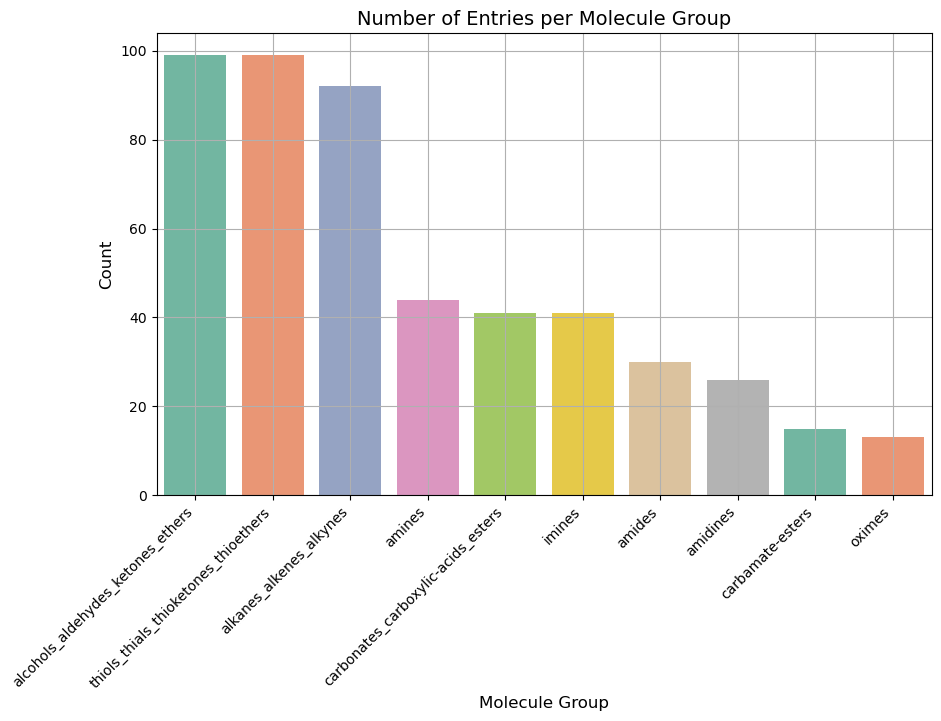

In [ ]:
group_counts = df_filtered['Molecule Group'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=group_counts.index, y=group_counts.values, hue=group_counts.index, palette="Set2", legend=False)

# Labels and title
plt.xlabel("Molecule Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Number of Entries per Molecule Group", fontsize=14)
plt.grid(True)

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.show()

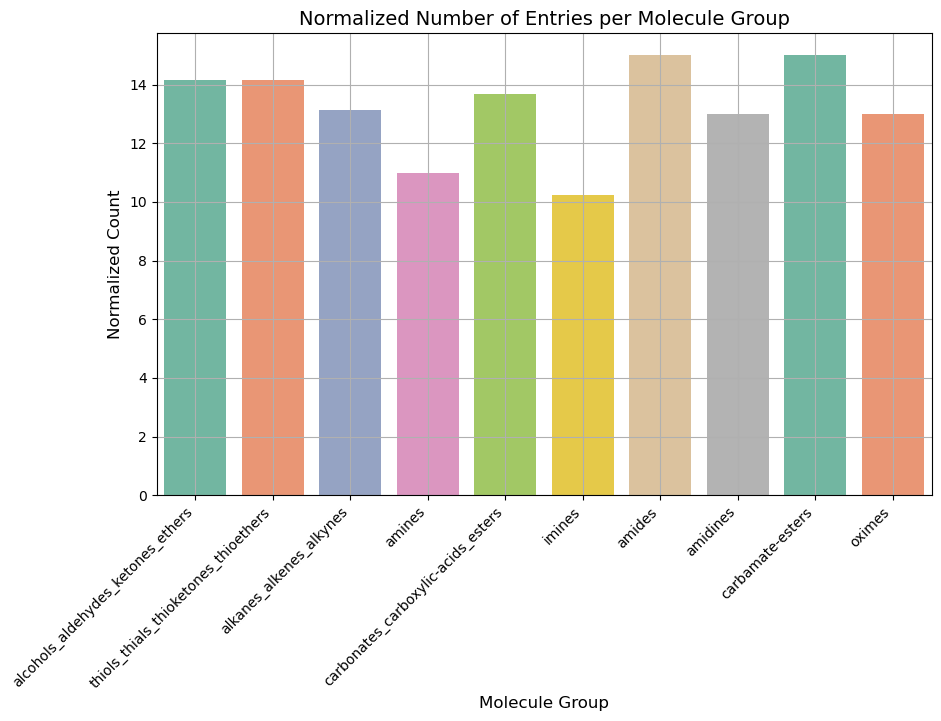

In [ ]:
group_counts = df_filtered['Molecule Group'].value_counts().reset_index()
group_counts.columns = ["Molecule Group", "Count"]

molecule_counts = df_filtered.groupby("Molecule Group")["Molecule"].nunique().reset_index()
molecule_counts.columns = ["Molecule Group", "Total Molecules"]

group_counts = group_counts.merge(molecule_counts, on="Molecule Group")
group_counts["Normalized Count"] = group_counts["Count"] / group_counts["Total Molecules"]

plt.figure(figsize=(10, 6))
sns.barplot(x="Molecule Group", y="Normalized Count", data=group_counts, hue="Molecule Group", palette="Set2", legend=False)

# Labels and title
plt.xlabel("Molecule Group", fontsize=12)
plt.ylabel("Normalized Count", fontsize=12)
plt.title("Normalized Number of Entries per Molecule Group", fontsize=14)
plt.grid(True)

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.show()

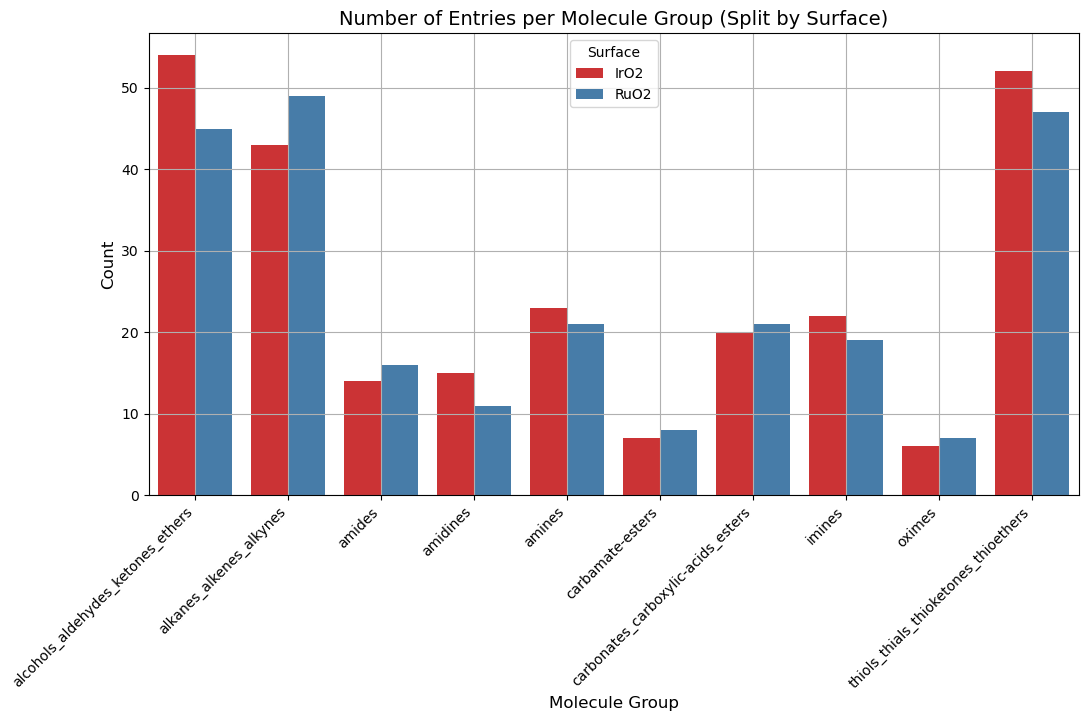

In [ ]:
group_surface_counts = df_filtered.groupby(['Molecule Group', 'Surface']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(x="Molecule Group", y="Count", hue="Surface", data=group_surface_counts, palette="Set1")

# Labels and title
plt.xlabel("Molecule Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Number of Entries per Molecule Group (Split by Surface)", fontsize=14)
plt.grid(True)

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.legend(title="Surface")

plt.show()

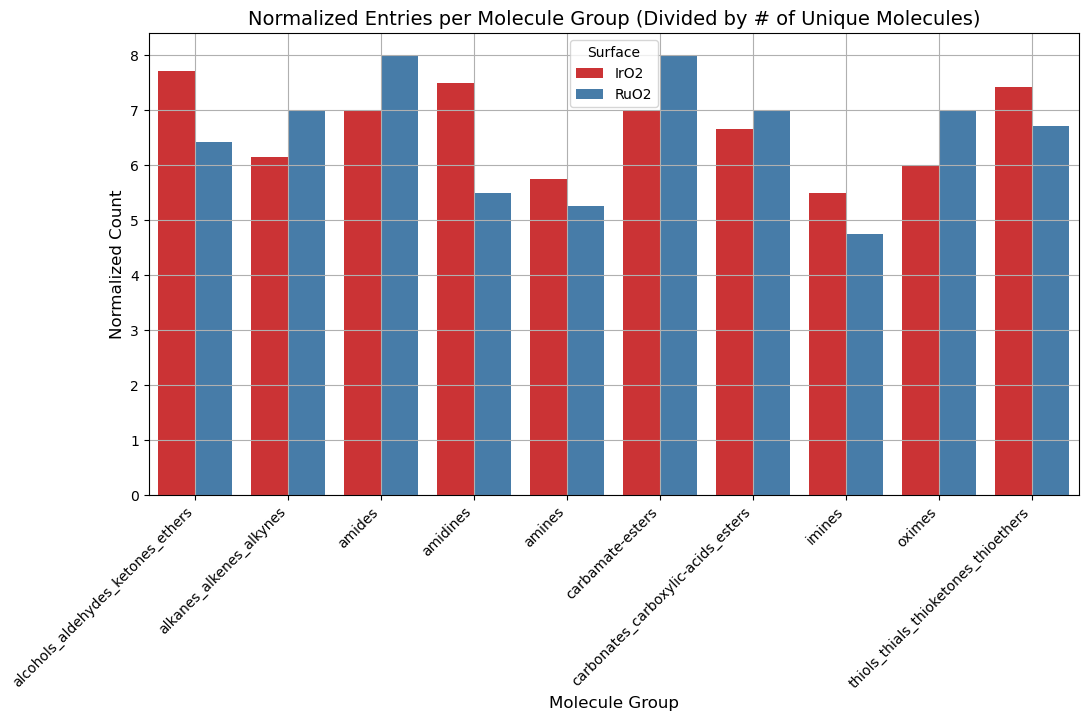

In [ ]:
group_surface_counts = df_filtered.groupby(['Molecule Group', 'Surface']).size().reset_index(name='Count')

molecule_counts = df_filtered.groupby("Molecule Group")["Molecule"].nunique().reset_index(name="Total Molecules")

group_surface_counts = group_surface_counts.merge(molecule_counts, on="Molecule Group")
group_surface_counts["Normalized Count"] = group_surface_counts["Count"] / group_surface_counts["Total Molecules"]

plt.figure(figsize=(12, 6))
sns.barplot(x="Molecule Group", y="Normalized Count", hue="Surface", data=group_surface_counts, palette="Set1")

# Labels and title
plt.xlabel("Molecule Group", fontsize=12)
plt.ylabel("Normalized Count", fontsize=12)
plt.title("Normalized Entries per Molecule Group (Divided by # of Unique Molecules)", fontsize=14)
plt.grid(True)

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.legend(title="Surface")

plt.show()

# Global Energy Distribution

In [ ]:
df_filtered["Adsorption Energy"].describe()

count    500.000000
mean      -1.517040
std        1.086818
min       -5.960000
25%       -2.315000
50%       -1.425000
75%       -0.520000
max        0.880000
Name: Adsorption Energy, dtype: float64

In [ ]:
df_RuO2["Adsorption Energy"].describe()

count    244.000000
mean      -1.154836
std        0.838738
min       -3.960000
25%       -1.772500
50%       -1.140000
75%       -0.397500
max        0.880000
Name: Adsorption Energy, dtype: float64

In [ ]:
df_IrO2["Adsorption Energy"].describe()

count    256.000000
mean      -1.862266
std        1.181456
min       -5.960000
25%       -2.715000
50%       -1.950000
75%       -0.820000
max        0.780000
Name: Adsorption Energy, dtype: float64

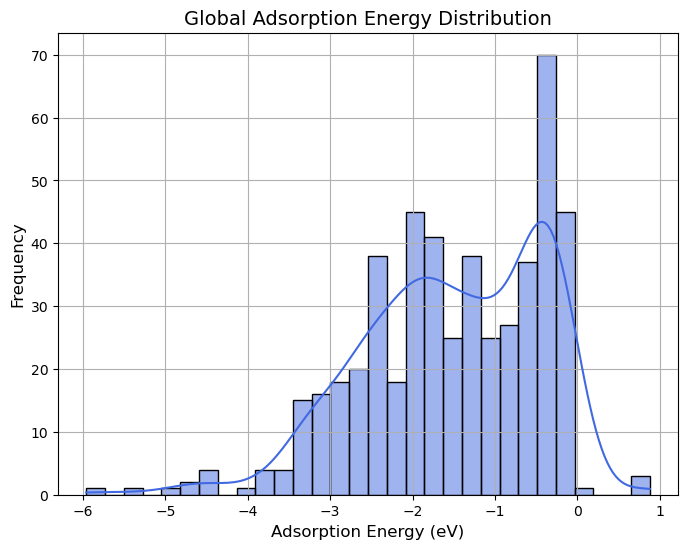

In [ ]:
plt.figure(figsize=(8, 6))

sns.histplot(df_filtered["Adsorption Energy"], bins=30, kde=True, color="royalblue")

# Labels and formatting
plt.xlabel("Adsorption Energy (eV)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Global Adsorption Energy Distribution", fontsize=14)
plt.grid(True)

plt.show()

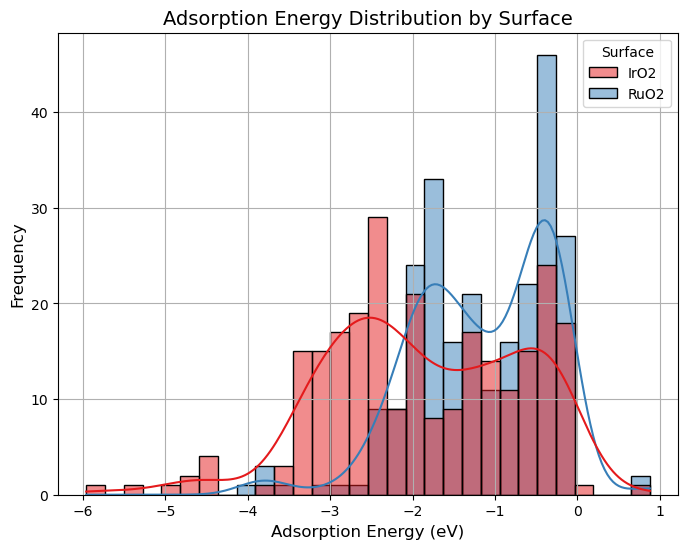

In [ ]:
plt.figure(figsize=(8, 6))

sns.histplot(df_filtered, x="Adsorption Energy", hue="Surface", bins=30, kde=True, palette="Set1")

plt.xlabel("Adsorption Energy (eV)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Adsorption Energy Distribution by Surface", fontsize=14)
plt.grid(True)

plt.show()

# Molecule Group Insights

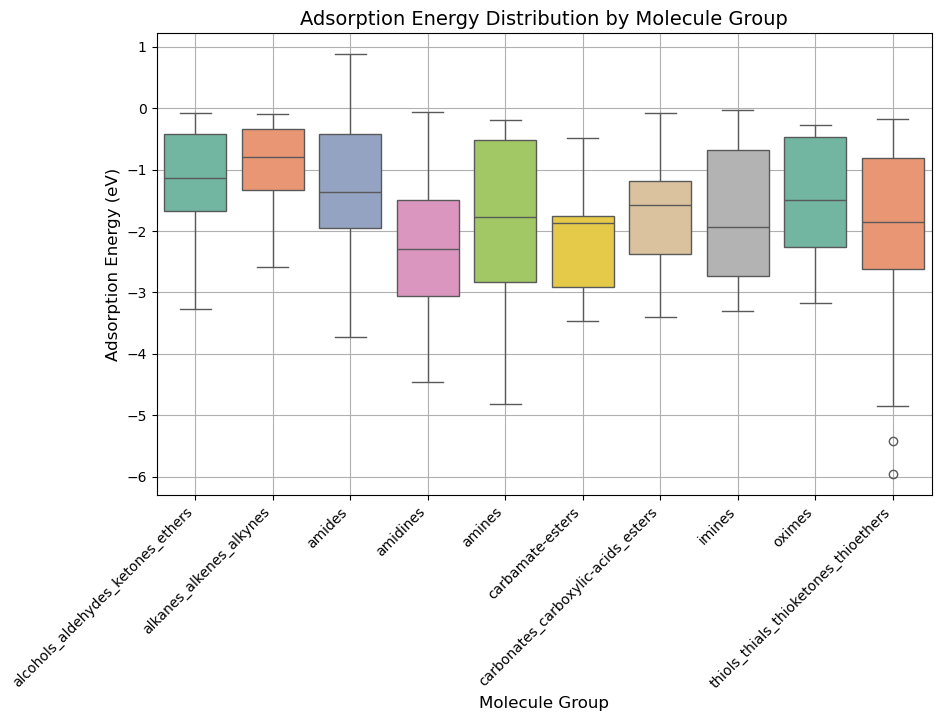

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(x="Molecule Group", y="Adsorption Energy", data=df_filtered, hue="Molecule Group", palette="Set2", legend=False)

# Labels and formatting
plt.xlabel("Molecule Group", fontsize=12)
plt.ylabel("Adsorption Energy (eV)", fontsize=12)
plt.title("Adsorption Energy Distribution by Molecule Group", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotate x labels for readability
plt.grid(True)

plt.show()

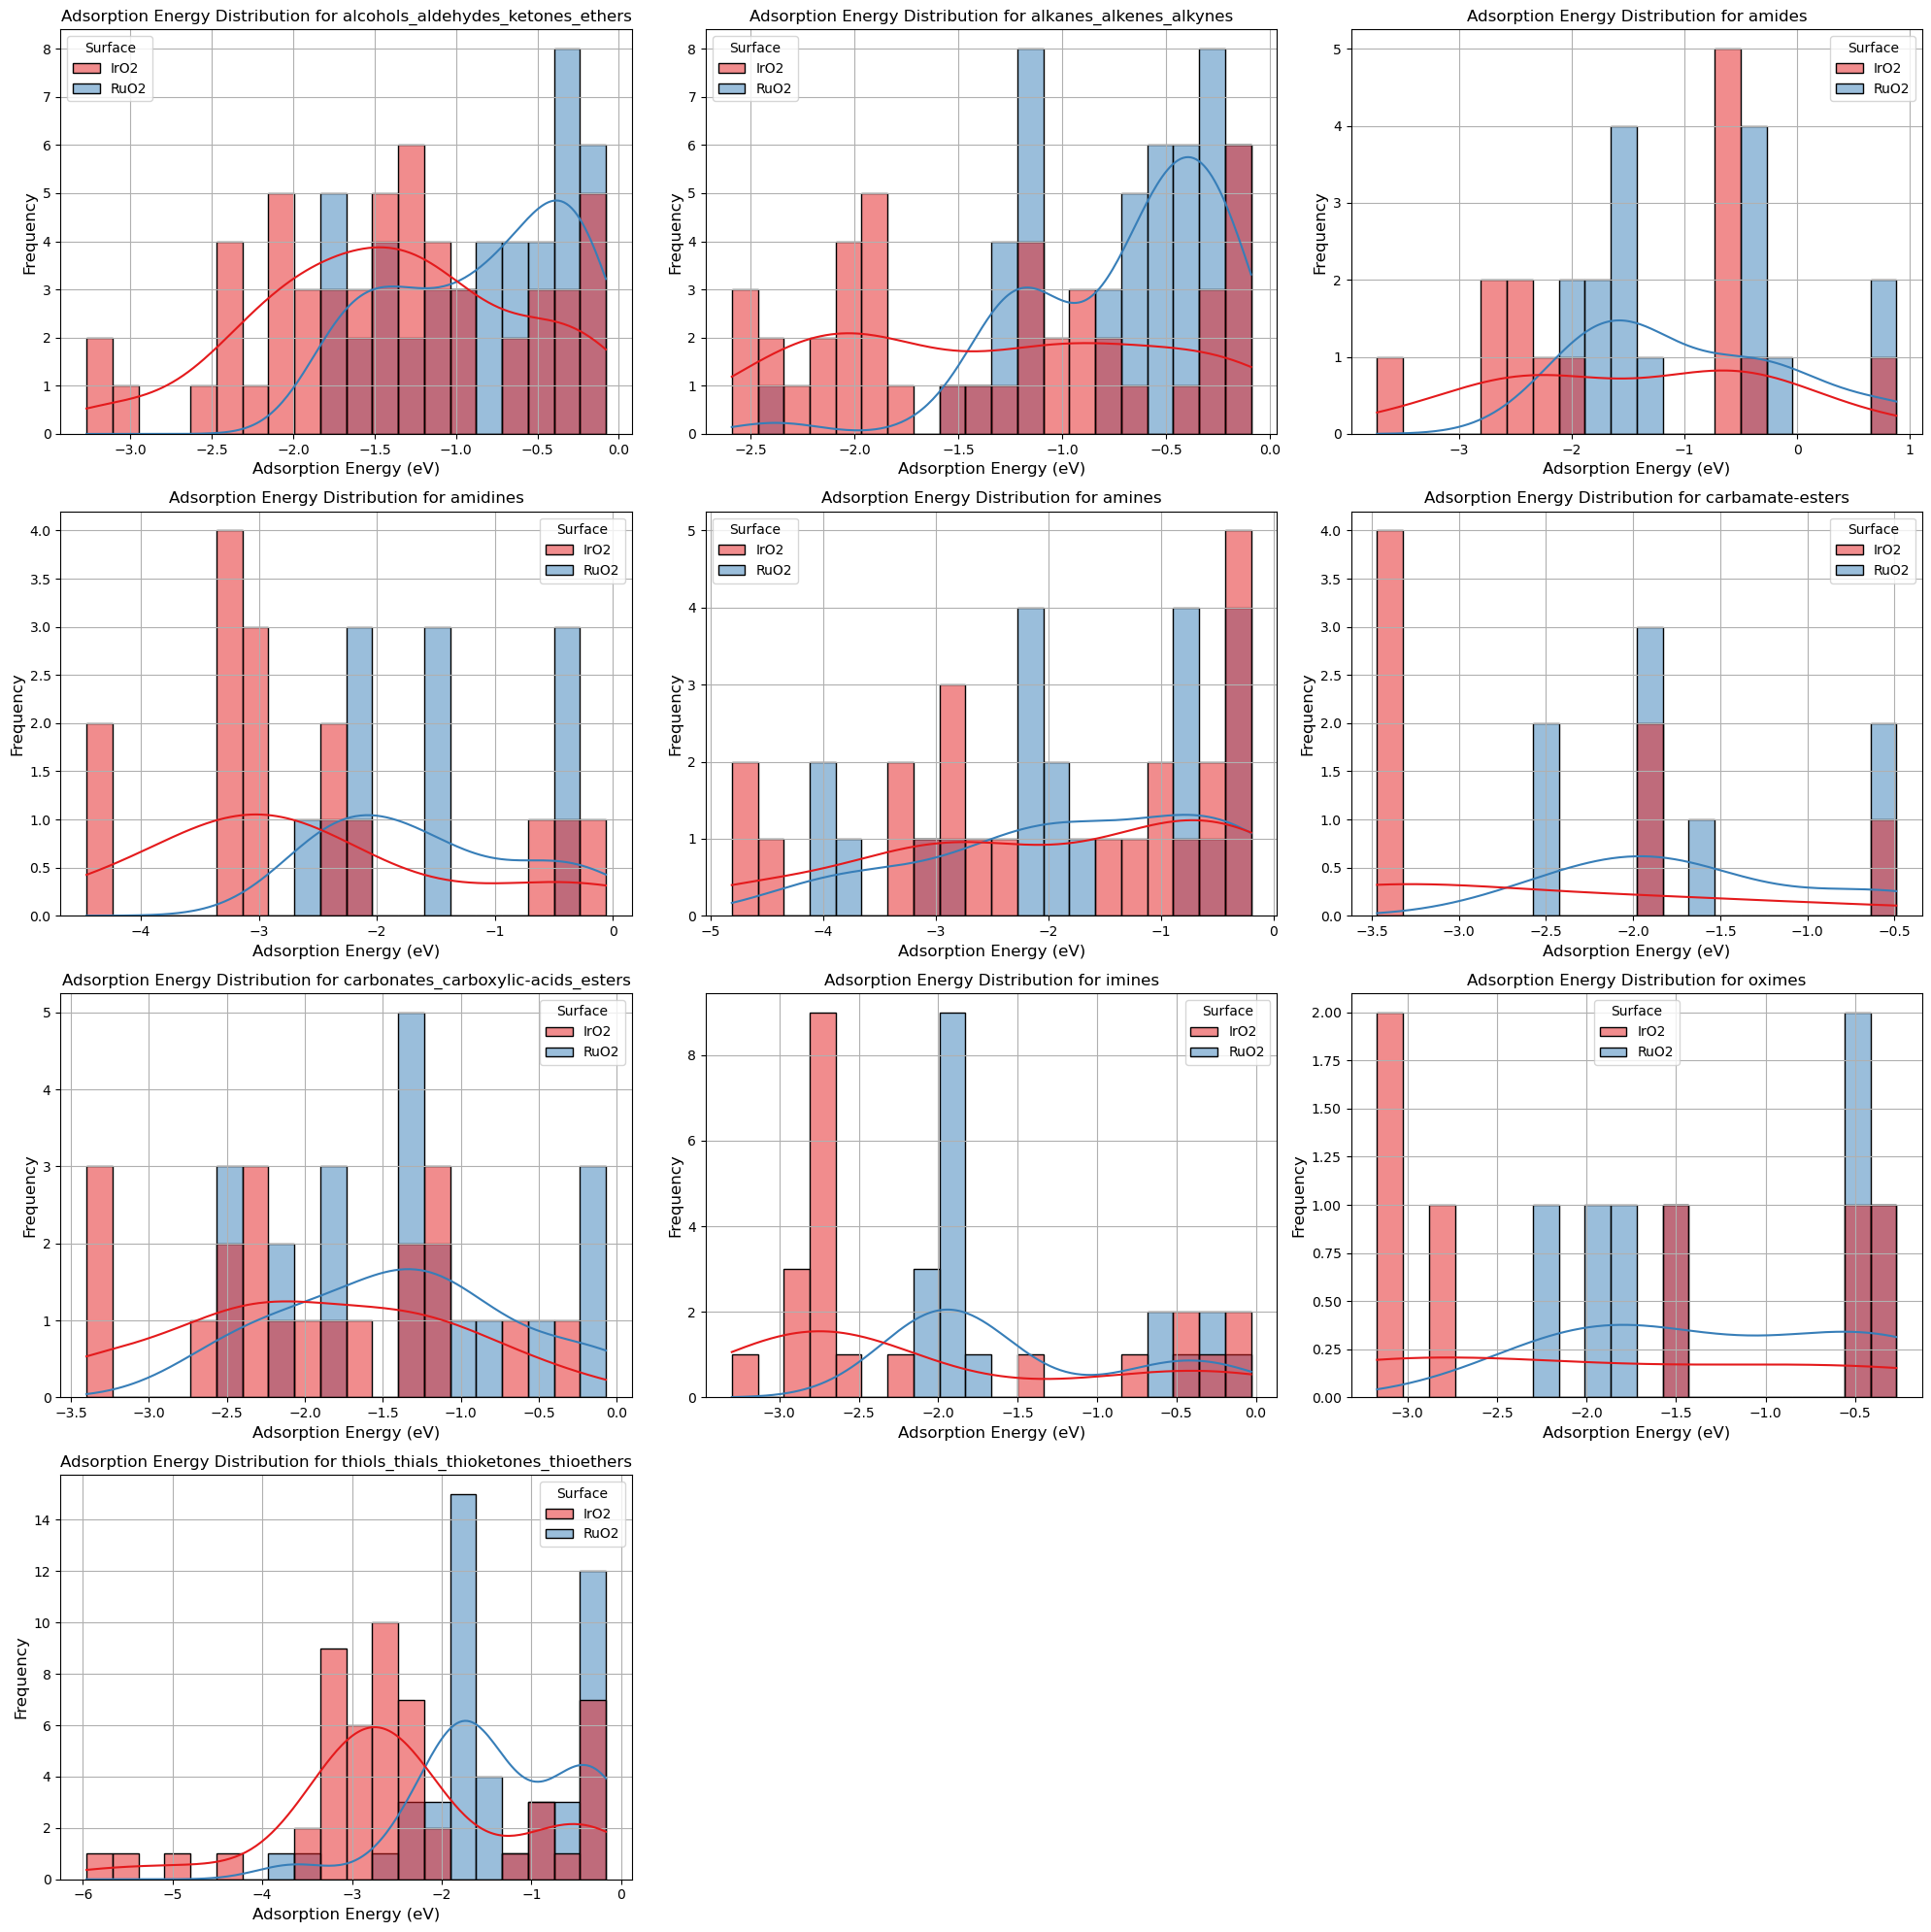

In [ ]:

molecule_groups = df_filtered['Molecule Group'].unique()

num_groups = len(molecule_groups)
ncols = 3 
nrows = (num_groups // ncols) + (num_groups % ncols > 0)

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 5 * nrows))
axes = axes.flatten()

# Plot each molecule group's adsorption energy distribution in a grid
for i, group in enumerate(molecule_groups):
    group_data = df_filtered[df_filtered['Molecule Group'] == group]
    
    sns.histplot(group_data, x='Adsorption Energy', hue='Surface', bins=20, kde=True, ax=axes[i], palette="Set1")
    
    # Set the title and labels
    axes[i].set_title(f"Adsorption Energy Distribution for {group}", fontsize=12)
    axes[i].set_xlabel("Adsorption Energy (eV)", fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].grid(True)

# Remove any unused subplots if the grid size is larger than needed
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
fig.tight_layout()

# Show the plot
plt.show()

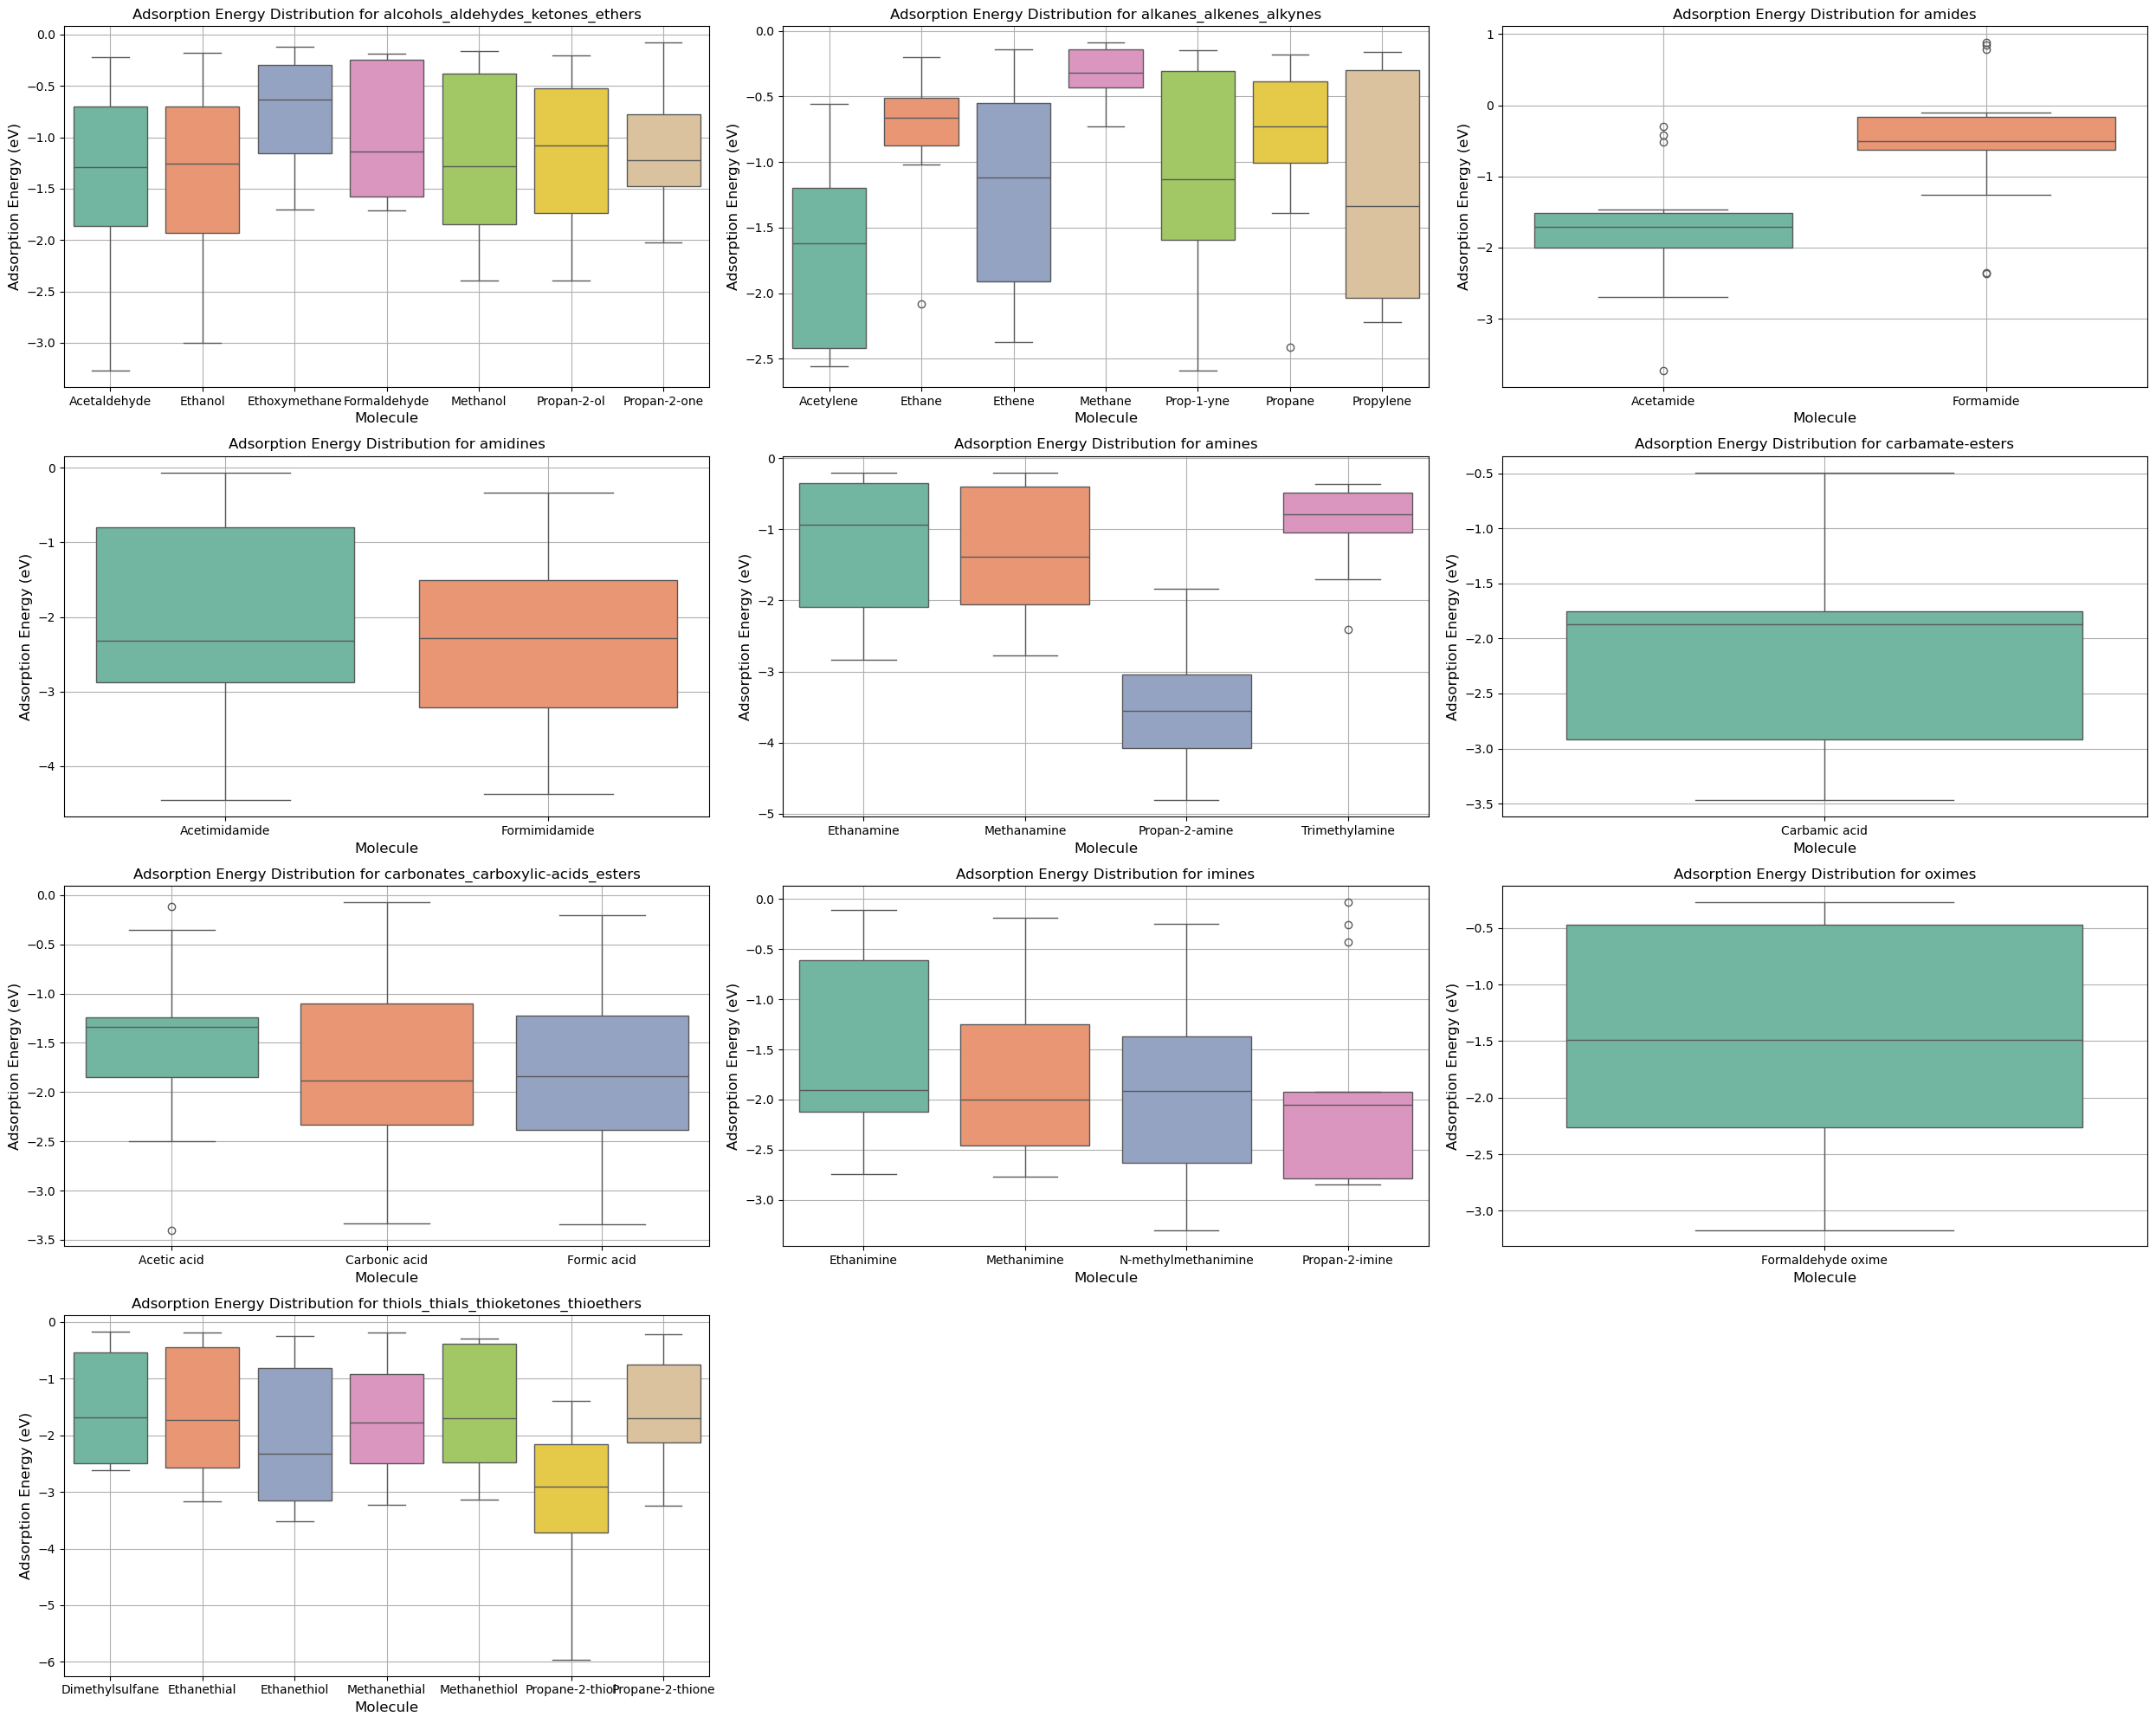

In [ ]:
molecule_groups = df_filtered['Molecule Group'].unique()

# Determine the number of groups and adjust the grid size
num_groups = len(molecule_groups)
ncols = 3 
nrows = (num_groups // ncols) + (num_groups % ncols > 0)

# Create a figure with a grid of subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(25, 5 * nrows))
axes = axes.flatten()

# Plot each molecule group's adsorption energy distribution in a grid
for i, group in enumerate(molecule_groups):
    group_data = df_filtered[df_filtered['Molecule Group'] == group]
    
    # Plot boxplot for each molecule group
    sns.boxplot(x='Molecule', y='Adsorption Energy', data=group_data, ax=axes[i], hue='Molecule', palette="Set2", legend=False)
    
    # Set the title and labels for each plot
    axes[i].set_title(f"Adsorption Energy Distribution for {group}", fontsize=12)
    axes[i].set_xlabel("Molecule", fontsize=12)
    axes[i].set_ylabel("Adsorption Energy (eV)", fontsize=12)
    axes[i].grid(True)

# Remove any unused subplots if the grid size is larger than needed
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap and improve readability
fig.tight_layout()

# Show the plot
plt.show()


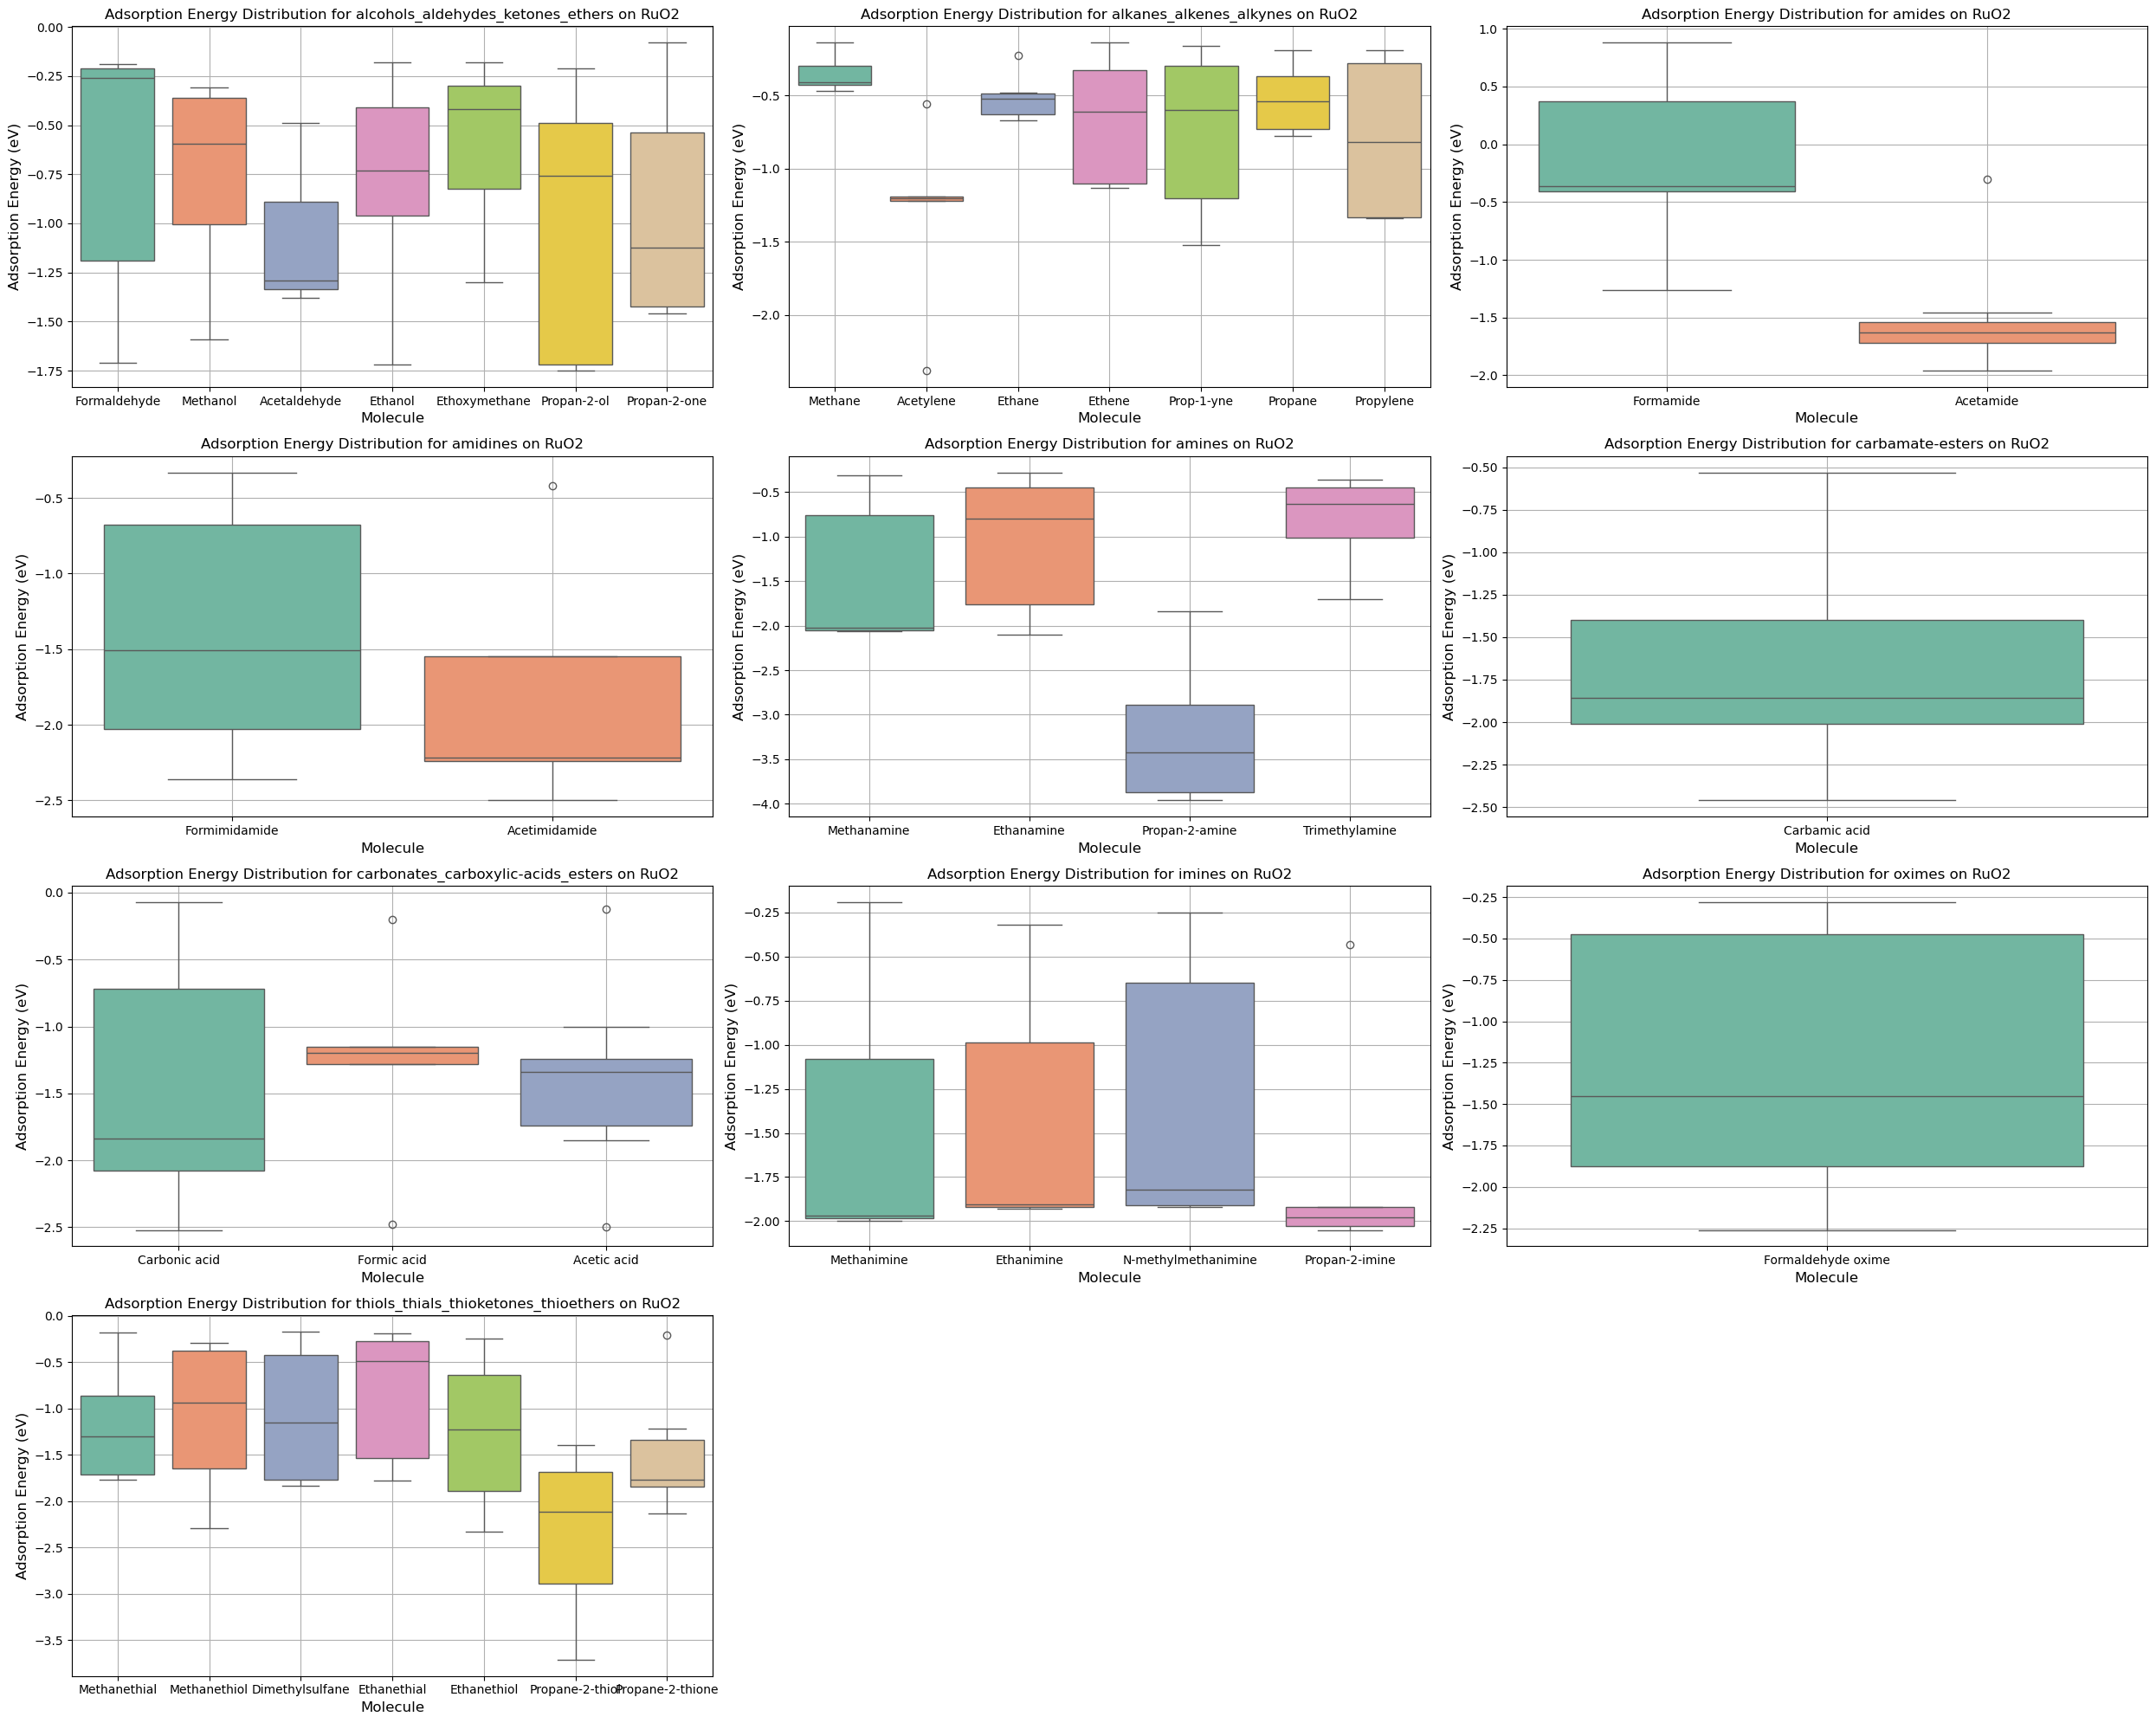

In [ ]:
molecule_groups = df_RuO2['Molecule Group'].unique()

# Determine the number of groups and adjust the grid size
num_groups = len(molecule_groups)
ncols = 3 
nrows = (num_groups // ncols) + (num_groups % ncols > 0)

# Create a figure with a grid of subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(25, 5 * nrows))
axes = axes.flatten()

# Plot each molecule group's adsorption energy distribution in a grid
for i, group in enumerate(molecule_groups):
    group_data = df_RuO2[df_RuO2['Molecule Group'] == group]
    
    # Plot boxplot for each molecule group
    sns.boxplot(x='Molecule', y='Adsorption Energy', data=group_data, ax=axes[i], hue='Molecule', palette="Set2", legend=False)
    
    # Set the title and labels for each plot
    axes[i].set_title(f"Adsorption Energy Distribution for {group} on RuO2", fontsize=12)
    axes[i].set_xlabel("Molecule", fontsize=12)
    axes[i].set_ylabel("Adsorption Energy (eV)", fontsize=12)
    axes[i].grid(True)

# Remove any unused subplots if the grid size is larger than needed
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap and improve readability
fig.tight_layout()

# Show the plot
plt.show()

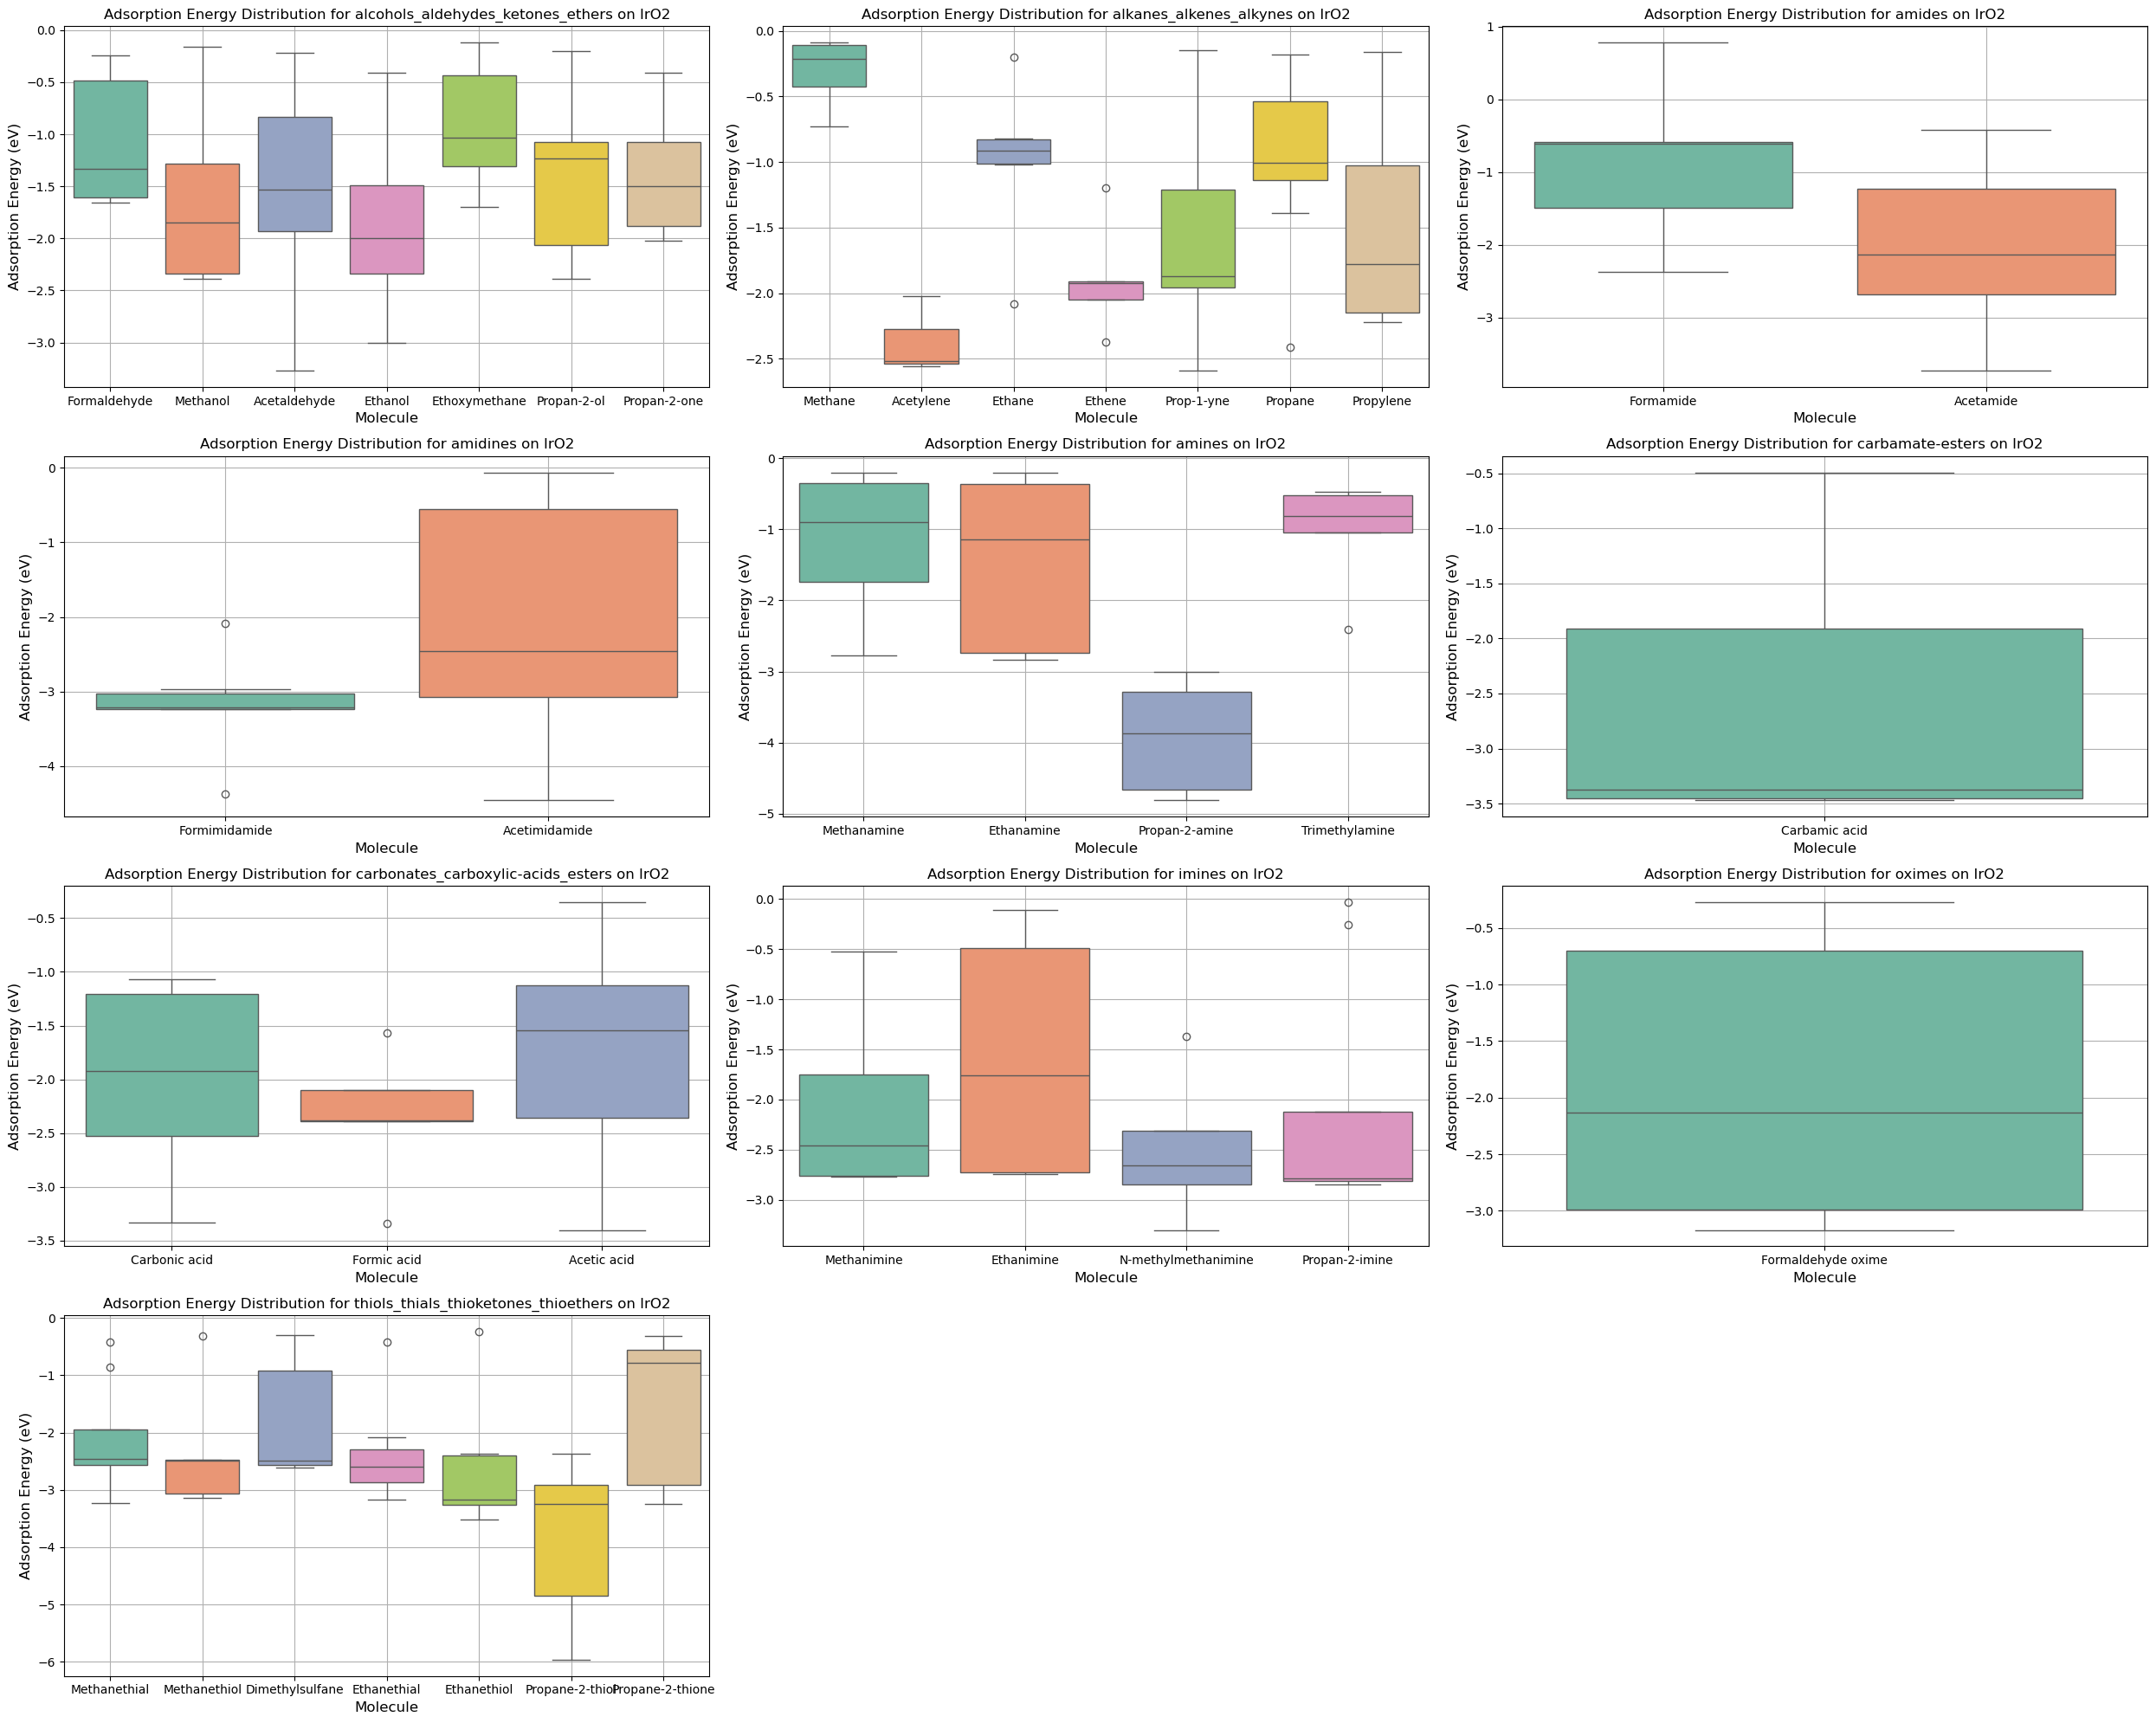

In [ ]:
molecule_groups = df_IrO2['Molecule Group'].unique()

# Determine the number of groups and adjust the grid size
num_groups = len(molecule_groups)
ncols = 3 
nrows = (num_groups // ncols) + (num_groups % ncols > 0)

# Create a figure with a grid of subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(25, 5 * nrows))
axes = axes.flatten()

# Plot each molecule group's adsorption energy distribution in a grid
for i, group in enumerate(molecule_groups):
    group_data = df_IrO2[df_IrO2['Molecule Group'] == group]
    
    # Plot boxplot for each molecule group
    sns.boxplot(x='Molecule', y='Adsorption Energy', data=group_data, ax=axes[i], hue='Molecule', palette="Set2", legend=False)
    
    # Set the title and labels for each plot
    axes[i].set_title(f"Adsorption Energy Distribution for {group} on IrO2", fontsize=12)
    axes[i].set_xlabel("Molecule", fontsize=12)
    axes[i].set_ylabel("Adsorption Energy (eV)", fontsize=12)
    axes[i].grid(True)

# Remove any unused subplots if the grid size is larger than needed
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap and improve readability
fig.tight_layout()

# Show the plot
plt.show()

# Number of Carbons Insights

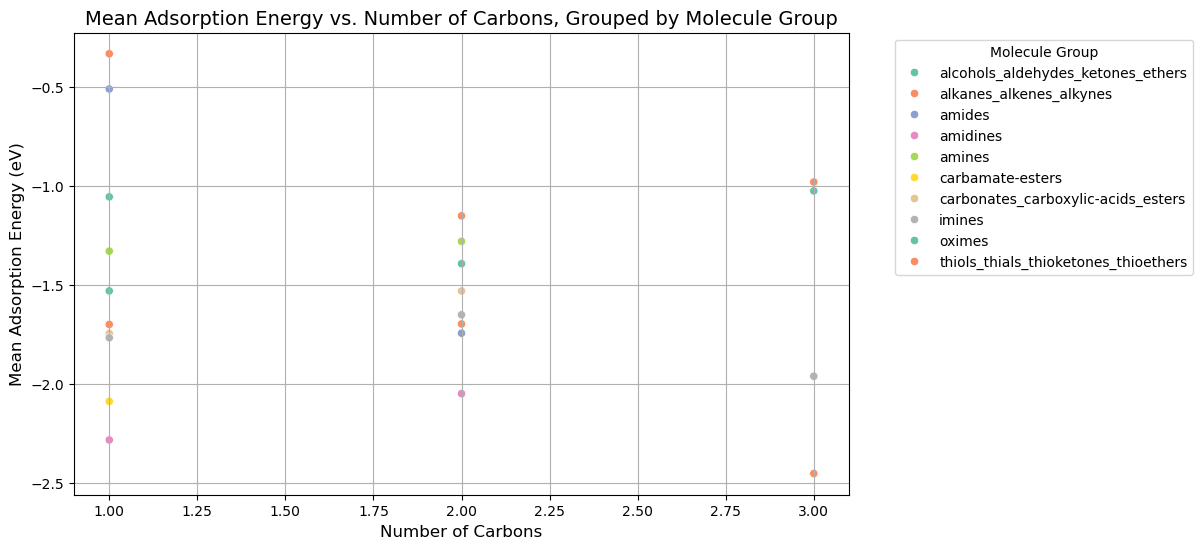

In [ ]:
df_mean = df_filtered.groupby(["Number of Carbons", "Molecule Group"])["Adsorption Energy"].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Number of Carbons", y="Adsorption Energy", hue="Molecule Group", data=df_mean, palette="Set2")

plt.xlabel("Number of Carbons", fontsize=12)
plt.ylabel("Mean Adsorption Energy (eV)", fontsize=12)
plt.title("Mean Adsorption Energy vs. Number of Carbons, Grouped by Molecule Group", fontsize=14)
plt.grid(True)

plt.legend(title="Molecule Group", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

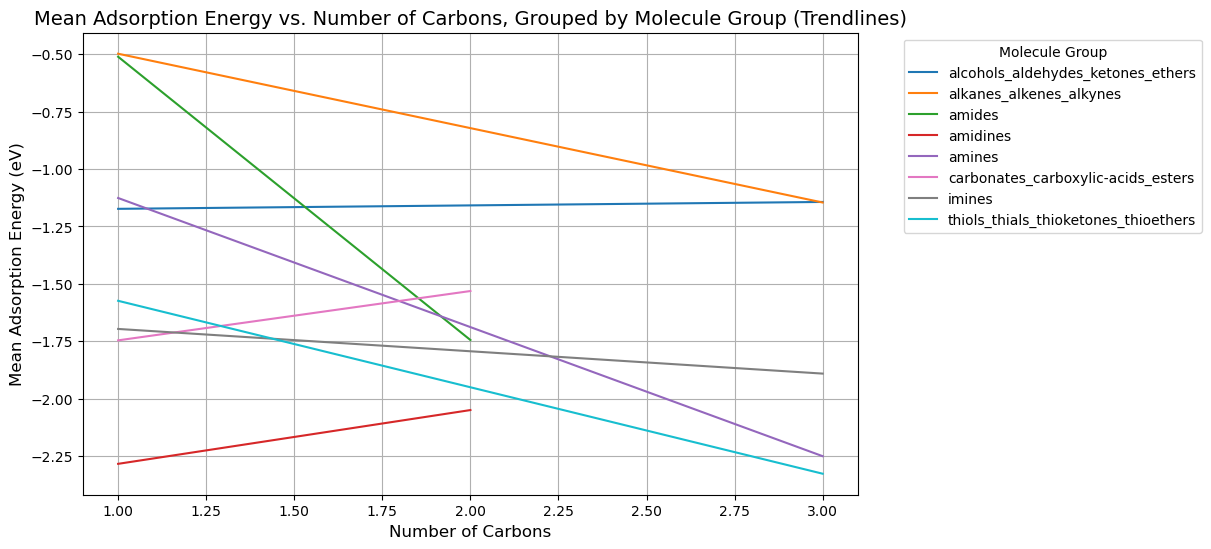

In [ ]:
df_mean = df_filtered.groupby(["Number of Carbons", "Molecule Group"])["Adsorption Energy"].mean().reset_index()

plt.figure(figsize=(10, 6))

for group in df_mean['Molecule Group'].unique():
    group_data = df_mean[df_mean['Molecule Group'] == group]
    
    # Use sns.regplot() for trendline (order=1 for linear fit)
    sns.regplot(x="Number of Carbons", y="Adsorption Energy", data=group_data, 
                scatter=False,  # Keep the scatter points
                fit_reg=True,  # Fit a regression line
                order=1,       # Linear trendline
                label=group,   # Label each line
                scatter_kws={'s': 100, 'edgecolor': 'w', 'alpha': 0.7}, # Customize points
                line_kws={'linewidth': 1.5},
                ci=None,
                )  

# Labels and formatting
plt.xlabel("Number of Carbons", fontsize=12)
plt.ylabel("Mean Adsorption Energy (eV)", fontsize=12)
plt.title("Mean Adsorption Energy vs. Number of Carbons, Grouped by Molecule Group (Trendlines)", fontsize=14)
plt.grid(True)

plt.legend(title="Molecule Group", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()